### Necessary imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import datetime

In [7]:
file_path_volts1 = r"C:\Users\Paul\PycharmProjects\Sustainable-Energy-Behavior\dataset\H1\Tagged_Training_04_13_1334300401\LF1V.csv"
file_path_amps1 = r"C:\Users\Paul\PycharmProjects\Sustainable-Energy-Behavior\dataset\H1\Tagged_Training_04_13_1334300401\LF1I.csv"
file_path_time_ticks1 = r"C:\Users\Paul\PycharmProjects\Sustainable-Energy-Behavior\dataset\H1\Tagged_Training_04_13_1334300401\TimeTicks1.csv"

file_path_volts2 = r"C:\Users\Paul\PycharmProjects\Sustainable-Energy-Behavior\dataset\H1\Tagged_Training_04_13_1334300401\LF1V.csv"
file_path_amps2 = r"C:\Users\Paul\PycharmProjects\Sustainable-Energy-Behavior\dataset\H1\Tagged_Training_04_13_1334300401\LF1I.csv"
file_path_time_ticks2 = r"C:\Users\Paul\PycharmProjects\Sustainable-Energy-Behavior\dataset\H1\Tagged_Training_04_13_1334300401\TimeTicks1.csv"

volts1 = pd.read_csv(file_path_volts1)
amps1 = pd.read_csv(file_path_amps1)
time_ticks1 = pd.read_csv(file_path_time_ticks1)

volts2 = pd.read_csv(file_path_volts2)
amps2 = pd.read_csv(file_path_amps2)
time_ticks2 = pd.read_csv(file_path_time_ticks2)

In [8]:
np_volts1 = np.array(volts1)
np_amps1 = np.array(amps1)
np_volts1 = np.array([[complex(y.replace("i", "j")) for y in x] for x in np_volts1])
np_amps1 = np.array([[complex(y.replace("i", "j")) for y in x] for x in np_amps1])

real_part_volts1 = np.real(np_volts1)
imag_part_volts1 = np.imag(np_volts1)
real_part_amps1 = np.real(np_amps1)
imag_part_amps1 = np.imag(np_amps1)
np_time_ticks1 = np.array(time_ticks1)

In [9]:
power1 = np.array(np_volts1.T[0])
for index in range(len(power1)):
    angleV = math.atan2(imag_part_volts1.T[0][index], real_part_volts1.T[0][index])
    angleI = math.atan2(imag_part_amps1.T[0][index], real_part_amps1.T[0][index])
    cos = math.cos(angleV - angleI)

    power1[index] = 0.5 * real_part_volts1.T[0][index] * real_part_amps1.T[0][index] * cos

power1 = np.abs(power1)

In [10]:
abs_z = np.abs(np_volts1)

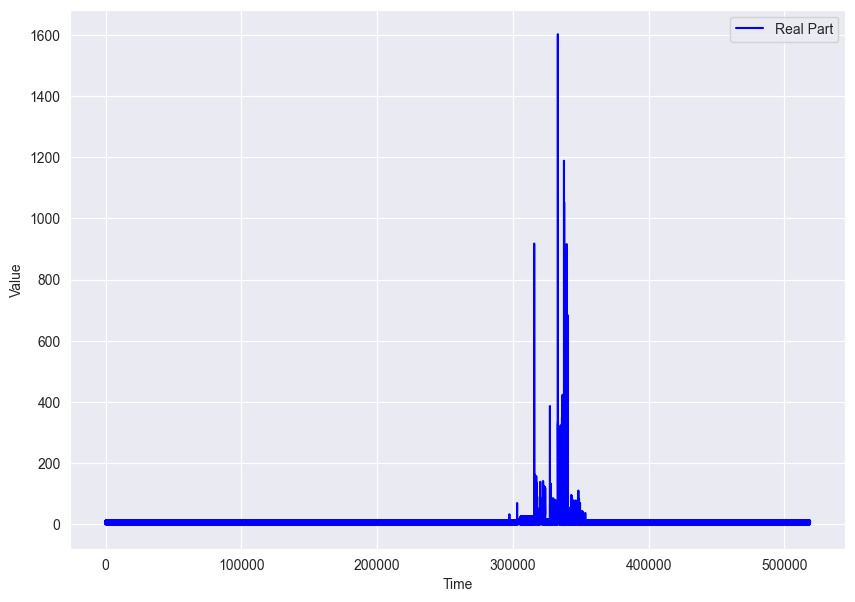

In [11]:
# Plot the real and imaginary parts separately
plt.figure(figsize=(10, 7))
plt.plot(range(len(power1)), power1, linestyle='-', color='b', label='Real Part')
#plt.plot(range(200), abs_z.T[1][:200], linestyle='-', color='r', label='Imaginary Part')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

1. Voltage phaser => obtain graph that combines real part and imaginary part
2. sqrt(a^2, b^2)
3. arctan(b/a)